In [6]:
# Initialization of camera feed, esc to capture frame
import cv2

cv2.namedWindow("tripod cam")
vc = cv2.VideoCapture(1)

if vc.isOpened(): # try to get the first frame
    rval, frame = vc.read()
else:
    rval = False

while rval:
    cv2.imshow("tripod cam", frame)
    rval, frame = vc.read()
    key = cv2.waitKey(20)
    if key == 27: # exit on ESC
        break

cv2.imwrite('Images/Pattern match/pillcard.png', frame)
vc.release()
cv2.destroyWindow("tripod cam")

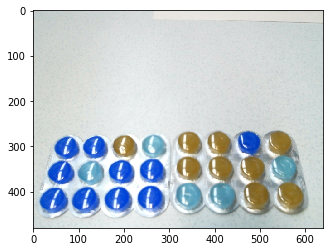

In [7]:
import cv2
import matplotlib.pyplot as plt

image_BGR = cv2.imread(r"G:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Machine vision\\MV2021\\Homework 2\\Python OpenCV2\\Images\\Pattern match\\pillcard.png")
#image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)
plt.imshow(image_BGR, interpolation='none') # Plot the image, turn off interpolation
plt.show() # Show the image window

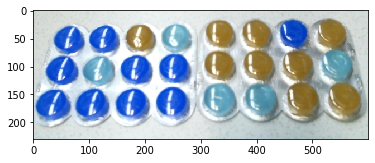

In [8]:
y_pixel = 250
x_pixel = 10

#image_RGB_crop = image_RGB[y_pixel:y_pixel+(480-y_pixel), x_pixel:x_pixel+(480-x_pixel)]
image_BGR_crop = image_BGR[y_pixel:y_pixel+(480-y_pixel), x_pixel:x_pixel+(610-x_pixel)]
plt.imshow(image_BGR_crop, interpolation='none') # Plot the image, turn off interpolation
plt.show() # Show the image window

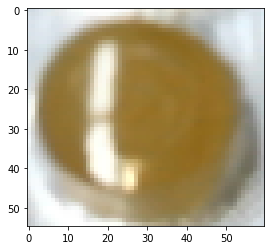

In [28]:
y_pixel = 135
x_pixel = 220

#pill_img_RGB = image_RGB_crop[y_pixel:y_pixel+(65-y_pixel), x_pixel:x_pixel+(75-x_pixel)]
orange_pill_BGR = image_BGR_crop[y_pixel:y_pixel+(195-y_pixel), x_pixel:x_pixel+(280-x_pixel)]
cv2.imwrite("Orange_pill_BGR.png",orange_pill_BGR)

y_pixel = 130
x_pixel = 300
yellow_pill_BGR = image_BGR_crop[y_pixel:y_pixel+(190-y_pixel), x_pixel:x_pixel+(365-x_pixel)]
cv2.imwrite("Yellow_pill_BGR.png",yellow_pill_BGR)

y_pixel = 70
x_pixel = 305
blue_pill_BGR = image_BGR_crop[y_pixel:y_pixel+(125-y_pixel), x_pixel:x_pixel+(365-x_pixel)]
cv2.imwrite("Blue_pill_BGR.png",blue_pill_BGR)

plt.imshow(blue_pill_BGR, interpolation='none') # Plot the image, turn off interpolation
plt.show() # Show the image window




In [33]:
template = pill_img

#https://www.pyimagesearch.com/2021/03/22/opencv-template-matching-cv2-matchtemplate/
result = cv2.matchTemplate(image_RGB, template, cv2.TM_CCOEFF_NORMED)

# show the output image
probThreshold = 0.7
h, w = template.shape[:2]
# fake out max_val for first run through loop
max_val = 1
counter = 0
while max_val > probThreshold:
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if max_val > probThreshold:
        result[max_loc[1]-h//2:max_loc[1]+h//2+1, max_loc[0]-w//2:max_loc[0]+w//2+1] = 0
        new_im = cv2.rectangle(image_BGR,(max_loc[0],max_loc[1]), (max_loc[0]+w+1, max_loc[1]+h+1), (0,255,0) )   
        counter = counter+1

#cv2.imwrite('output.png', new_im)


print(counter)
cv2.imshow("Output", new_im)
cv2.waitKey(0)


8


-1

In [6]:
# Live detection
pill_img_copy = cv2.cvtColor(pill_img, cv2.COLOR_BGR2RGB)
template = pill_img_copy

cv2.namedWindow("tripod cam")
vc = cv2.VideoCapture(1)

if vc.isOpened(): # try to get the first frame
    rval, img = vc.read()
else:
    rval = False

cv2.destroyWindow("tripod cam")

while True:
    rval, img = vc.read()
    key = cv2.waitKey(20)
    
    result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)

# show the output image
    probThreshold = 0.7
    h, w = template.shape[:2]
    # fake out max_val for first run through loop
    max_val = 1
    counter = 0
    new_im = img
    while max_val > probThreshold:
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > probThreshold:
            result[max_loc[1]-h//2:max_loc[1]+h//2+1, max_loc[0]-w//2:max_loc[0]+w//2+1] = 0
            new_im = cv2.rectangle(img,(max_loc[0],max_loc[1]), (max_loc[0]+w+1, max_loc[1]+h+1), (0,255,0) )   
            counter = counter+1

    #cv2.imwrite('output.png', new_im)


    print(counter)
    cv2.imshow("Output", new_im)
    cv2.waitKey(20)
        

    if key == 27: # exit on ESC
        break

vc.release()
cv2.destroyWindow("Output")

7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
3
0
0
0
0
0
0
0
0
0
0
0
3
8
7
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
6
6
5
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
2
2
2
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
3
6
7
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
4
7
7
6
4
3
4
3
3
3
3
3
3
3
3
4
5
4
4
5
5
5
5
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
5
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
3
4
3
5
8
8
8
8
8
8
8
8
8
6
5
4
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
2
2
0
0
0
3
3
2
3
3
2
2
3
3
3
3
3
3
3
3
5
8
8
8
8
8
8
8
8
8
4
4
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
4
8
8
8
8
7
7
7
7
7
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
5
7
7
7
7
7
7
7
7
4
2
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
7
8
8
8
8
8
8
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
6
6
6
5
5
5
6
7
7
6
5
5
5
0
0
3
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
4
5
6
5
6
6
6
6
6
6
5
6
6
6
6
6
5
5
5
5
5
5
6
4
6
7
7


In [13]:
# Live detection
# With non_max_suppression
import cv2
import numpy as np
from imutils.object_detection import non_max_suppression

template_orange = cv2.imread(r"G:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Machine vision\\MV2021\\Homework 2\\Python OpenCV2\\Images\\Calibration\\orange_temp.png")
template_yellow = cv2.imread(r"G:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Machine vision\\MV2021\\Homework 2\\Python OpenCV2\\Images\\Calibration\\yellow_temp.png")
template_blue = cv2.imread(r"G:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Machine vision\\MV2021\\Homework 2\\Python OpenCV2\\Images\\Calibration\\blue_template.png")
template_empty = cv2.imread(r"G:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Machine vision\\MV2021\\Homework 2\\Python OpenCV2\\Images\\Calibration\\empty-temp.png")

templates=[template_orange, template_yellow, template_blue, template_empty]
colours = [[0,165,255],
           [15,253,250],
           [255,0,0],
           [0,0,0]]

#template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
(tH, tW) = templates[2].shape[:2]
cv2.namedWindow("tripod cam")
vc = cv2.VideoCapture(1)

if vc.isOpened(): # try to get the first frame
    rval, img = vc.read()
else:
    rval = False

cv2.destroyWindow("tripod cam")
probThreshold = 0.6
while True:
    rval, img = vc.read()
    key = cv2.waitKey(20)
    i = 0
    for template in templates:
        bound_colour = colours[i]
        i += 1
        result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
        (yCoords, xCoords) = np.where(result >= probThreshold)
        clone = img.copy()

        # initialize our list of rectangles
        rects = []
        # loop over the starting (x, y)-coordinates again
        for (x, y) in zip(xCoords, yCoords):
            # update our list of rectangles
            rects.append((x, y, x + tW, y + tH))
        # apply non-maxima suppression to the rectangles
        pick = non_max_suppression(np.array(rects))
        
        # loop over the final bounding boxes
        for (startX, startY, endX, endY) in pick:
            # draw the bounding box on the image
            cv2.rectangle(img, (startX, startY), (endX, endY),
                bound_colour, 3)


    
    cv2.imshow("Output", img)
    cv2.waitKey(20)
    if key == 27: # exit on ESC
        break

vc.release()
cv2.destroyWindow("Output")

In [19]:
# Non-live detection
# With non_max_suppression
import cv2
import numpy as np
from imutils.object_detection import non_max_suppression

template_orange = cv2.imread(r"G:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Machine vision\\MV2021\\Homework 2\\Python OpenCV2\\Images\\Calibration\\orange_temp.png")
template_yellow = cv2.imread(r"G:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Machine vision\\MV2021\\Homework 2\\Python OpenCV2\\Images\\Calibration\\yellow_temp.png")
template_blue = cv2.imread(r"G:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Machine vision\\MV2021\\Homework 2\\Python OpenCV2\\Images\\Calibration\\blue_template.png")
template_empty = cv2.imread(r"G:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Machine vision\\MV2021\\Homework 2\\Python OpenCV2\\Images\\Calibration\\empty-temp.png")

templates=[template_orange, template_yellow, template_blue, template_empty]
colours = [[0,165,255],
           [15,253,250],
           [255,0,0],
           [0,0,0]]

#template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
(tH, tW) = templates[2].shape[:2]
cv2.namedWindow("tripod cam")
vc = cv2.VideoCapture(1)

if vc.isOpened(): # try to get the first frame
    rval, img = vc.read()
else:
    rval = False

cv2.destroyWindow("tripod cam")
probThreshold = 0.6
rval, img = vc.read()
key = cv2.waitKey(20)
i = 0
points = []

for template in templates:
    bound_colour = colours[i]
    i += 1
    result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
    (yCoords, xCoords) = np.where(result >= probThreshold)
    clone = img.copy()

    # initialize our list of rectangles
    rects = []
    # loop over the starting (x, y)-coordinates again
    for (x, y) in zip(xCoords, yCoords):
        # update our list of rectangles
        rects.append((x, y, x + tW, y + tH))
    # apply non-maxima suppression to the rectangles
    pick = non_max_suppression(np.array(rects))


    # loop over the final bounding boxes
    for (startX, startY, endX, endY) in pick:
        # draw the bounding box on the image
        cv2.rectangle(img, (startX, startY), (endX, endY),
            bound_colour, 3)
        points.append((startX, startY, endX, endY, bound_colour))



cv2.imshow("Output", img)
cv2.imwrite("G:\\My Drive\\1. EIT Digital master\\Estland\\Semester 1\\Machine vision\\MV2021\\Homework 2\\Python OpenCV2\\Images\\Calibration\\pills_boundbox_calib2.png", img)
print('points:\n')
print(points)
print()

cv2.waitKey(0)

points:

[(113, 332, 207, 424, [0, 165, 255]), (230, 328, 324, 420, [0, 165, 255]), (354, 323, 448, 415, [0, 165, 255]), (470, 317, 564, 409, [0, 165, 255]), (110, 222, 204, 314, [0, 165, 255]), (345, 216, 439, 308, [0, 165, 255]), (469, 211, 563, 303, [0, 165, 255]), (225, 107, 319, 199, [0, 165, 255]), (228, 215, 322, 307, [15, 253, 250]), (461, 95, 555, 187, [15, 253, 250]), (341, 97, 435, 189, [255, 0, 0]), (100, 103, 194, 195, [0, 0, 0])]



-1

In [49]:
rectangles = [(113, 332, 207, 424, [0, 165, 255]), (230, 328, 324, 420, [0, 165, 255]), (354, 323, 448, 415, [0, 165, 255]), (470, 317, 564, 409, [0, 165, 255]), (110, 222, 204, 314, [0, 165, 255]), (345, 216, 439, 308, [0, 165, 255]), (469, 211, 563, 303, [0, 165, 255]), (225, 107, 319, 199, [0, 165, 255]), (228, 215, 322, 307, [15, 253, 250]), (461, 95, 555, 187, [15, 253, 250]), (341, 97, 435, 189, [255, 0, 0]), (100, 103, 194, 195, [0, 0, 0])]


In [110]:
# Computing distances between points
# Origin
origin = min(rectangles)
x_0 = round( origin[0] + (origin[2] - origin[0])/2 )
y_0 = round( origin[1] + (origin[3] - origin[1])/2 )
origin_colour = origin[4]

center_rectangles_x = np.zeros(len(rectangles))
center_rectangles_y = np.zeros(len(rectangles))


for i in range(12):
    center_rectangles_x[i] = round( rectangles[i][0] + (rectangles[i][2] - rectangles[i][0])/2 )
    center_rectangles_y[i] = round( rectangles[i][1] + (rectangles[i][3] - rectangles[i][1])/2 )
center_rectangles = np.transpose([center_rectangles_x, center_rectangles_y])

distx = np.zeros(len(rectangles))
disty = np.zeros(len(rectangles))
dist_man = np.zeros(len(rectangles))

for i in range(12):
    distx[i] = center_rectangles_x[i] - x_0
    disty[i] = center_rectangles_y[i] - y_0
    dist_man[i] = distx[i] + disty[i]



range(0, 12)
